Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [4]:
library('tidymodels')



── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [6]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [7]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 1, 3, 8, 13, 5, 3, 6, 10, 4, 3, …
$ Glucose                  <dbl> 89, 116, 115, 110, 103, 126, 99, 145, 109, 88…
$ BloodPressure            <dbl> 66, 74, 0, 92, 30, 88, 84, 82, 75, 58, 92, 78…
$ SkinThickness            <dbl> 23, 0, 0, 0, 38, 41, 0, 19, 26, 11, 0, 31, 33…
$ Insulin                  <dbl> 94, 0, 0, 0, 83, 235, 0, 110, 0, 54, 0, 0, 19…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 37.6, 43.3, 39.3, 35.4, 22.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 21, 30, 29, 30, 33, 27, 50, 57, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** Outcome because it is binary 0/1

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         |Body mass index (weight in kg/(height in m) ^2)             |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

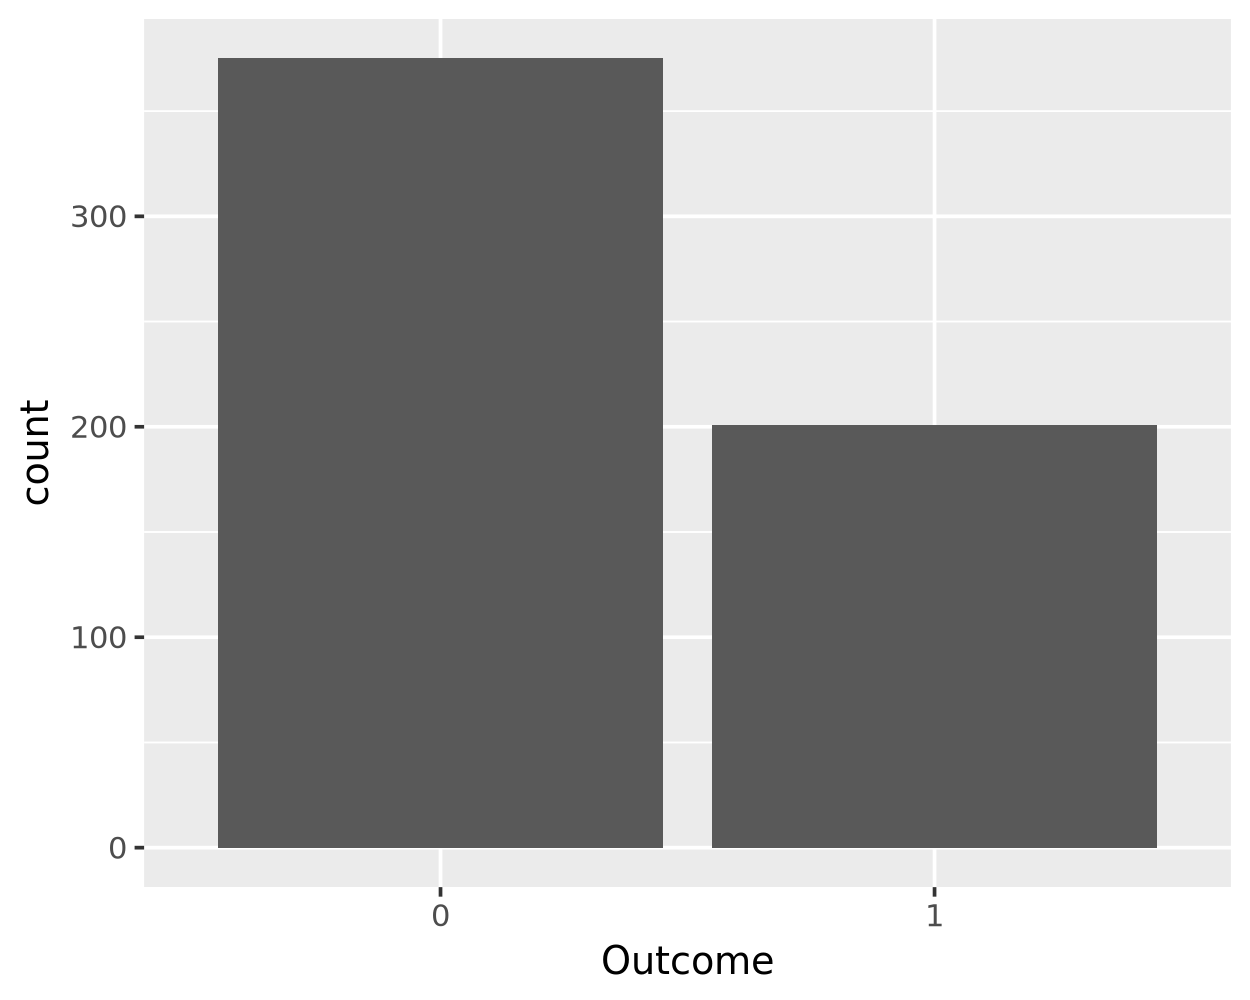

In [12]:
ggplot(diabetes_train,aes(x=Outcome))+
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** Yes, it appears there are equal counts

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [14]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

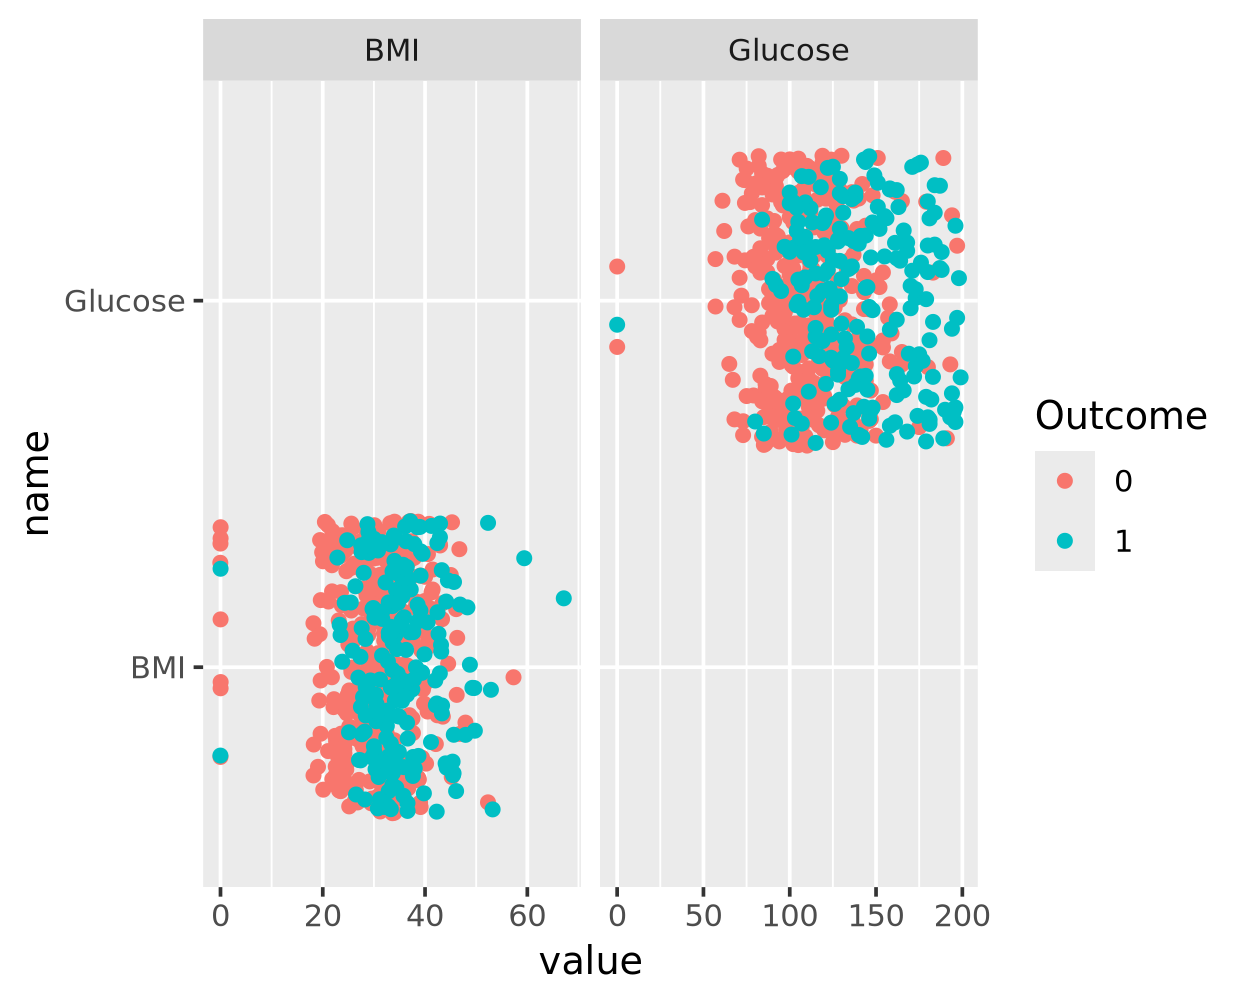

In [15]:
ggplot(data = plot_df, mapping = aes(x = value, y= name ))+
    geom_jitter(aes(color=Outcome))+
    facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** It changes the scaling and jumbles the data visualization

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [20]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train )

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.30238889,0.675203446,-10.815094,2.919925e-27
BMI,0.06639438,0.014908500,4.453458,8.449812e-06
Glucose,0.03612305,0.003874752,9.322674,1.134442e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [21]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()



.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9217121,0.07828794,1,85,66,29,0,26.6,0.351,31,0
0,0.9188307,0.08116926,3,78,50,32,88,31.0,0.248,26,1
1,0.1371838,0.86281619,2,197,70,45,543,30.5,0.158,53,1
0,0.6182195,0.38178052,10,139,80,0,0,27.1,1.441,57,0
1,0.1789705,0.82102947,1,189,60,23,846,30.1,0.398,59,1
1,0.4997517,0.50024834,0,118,84,47,230,45.8,0.551,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [22]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  28
         1  13  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** 
- How many individuals had diabetes in your test data? 67
- Of those that actually had diabetes, how many were predicted to have diabetes by your model? 39
- How many individuals predicted to have diabetes did not have diabetes? 13